In [112]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score


%matplotlib inline

In [56]:
# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

In [57]:
# Columns contain the data headers and responses contains the actual data
columns = pd.read_csv(r'/Users/jaimin/Documents/Kaggle/young-people-survey/columns.csv')
young = pd.read_csv(r'/Users/jaimin/Documents/Kaggle/young-people-survey/responses.csv')


In [58]:
young.describe()


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

In [59]:
var_of_interest = 'Village - town'
mapping = {var_of_interest: {'city': 0, 'village': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
young["all"] = ""

In [60]:
# var_of_interest = 'Smoking'
# mapping = {var_of_interest: {'never smoked': 0, 'tried smoking': 1, 'former smoker': 2, 'current smoker': 3}}
# young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
# young["all"] = ""

(array([0, 1]), <a list of 2 Text yticklabel objects>)

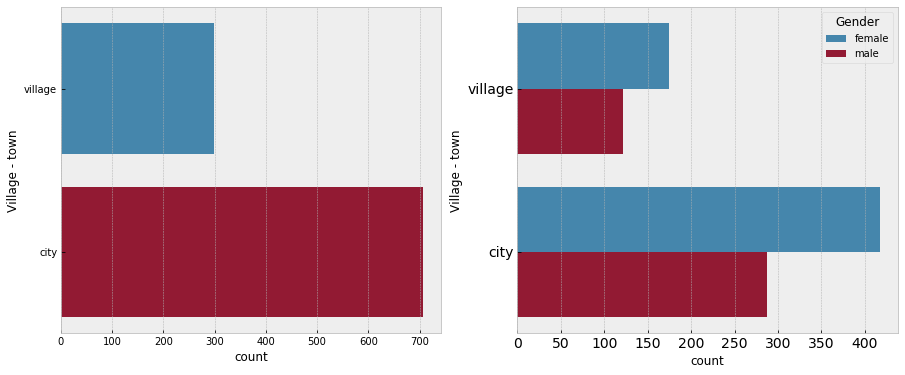

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.countplot(y=var_of_interest, data=young, ax=ax[0])
sns.countplot(y=var_of_interest, hue='Gender', data=young, ax=ax[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

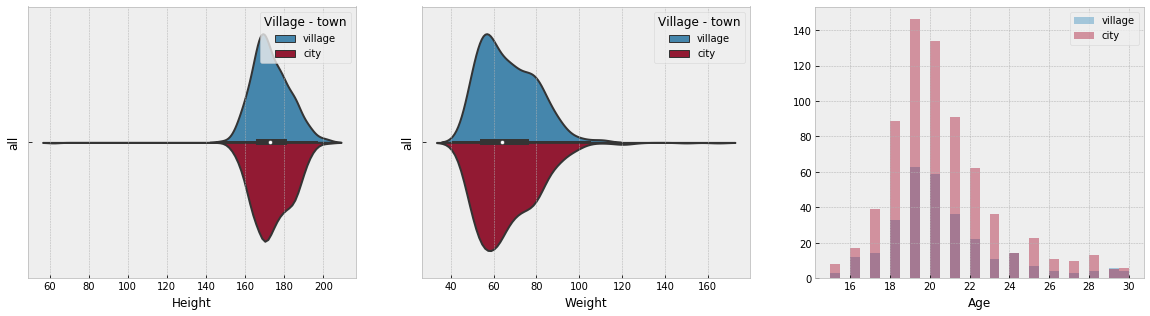

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0]);
data = young.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1]);

var_of_int_ser = young[var_of_interest]
sns.distplot(young[var_of_int_ser=='village'].Age.dropna(),
             label='village', ax=ax[2], kde=False, bins=30);

sns.distplot(young[var_of_int_ser=='city'].Age.dropna(),
             label='city', ax=ax[2], kde=False, bins=30);
ax[2].legend()

In [63]:
display(young[young['Height']<70][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])
display(young[young['Weight']>120][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])

,Age,Height,Weight,Gender,Village - town
676,20.0,62.0,55.0,female,city


,Age,Height,Weight,Gender,Village - town
859,20.0,190.0,125.0,male,city
885,23.0,NaN,165.0,female,city
992,30.0,200.0,150.0,male,city


In [64]:
young.drop([676,885,992, 859], inplace = True)


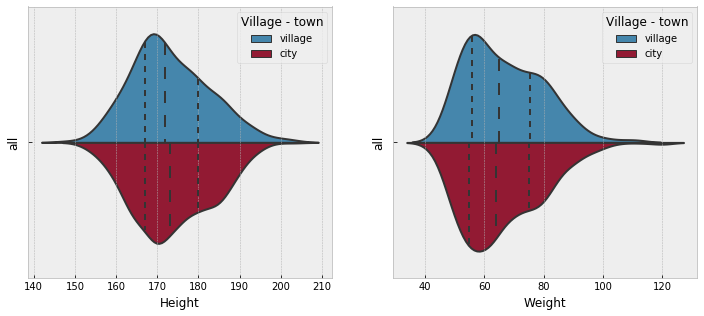

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data = young.dropna(subset=['Height'])
sns.violinplot(x='Height', y="all", hue=var_of_interest, data=data, 
                   split=True, ax=ax[0], inner='quartile');

data = young.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y="all", hue=var_of_interest, data=data, 
                   split=True, ax=ax[1], inner='quartile');

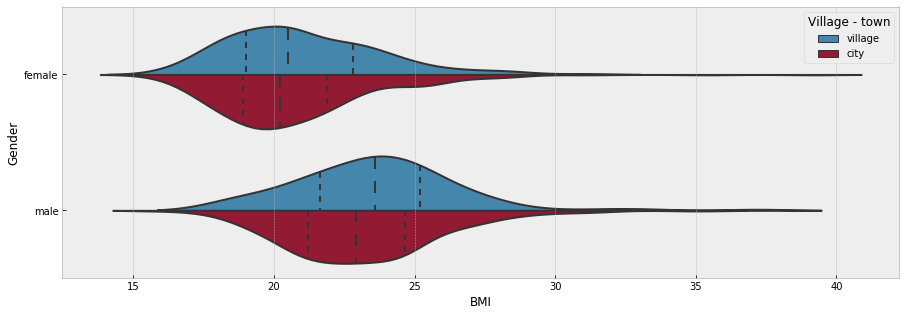

In [66]:
young['BMI'] = round(young['Weight']/((young['Height']/100)**2),1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
data = young.dropna(subset=['BMI'])
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data, 
               split=True, inner='quartile', ax=ax);

In [67]:
import scipy.stats as stats
city_bmi = data[data[var_of_interest]=='city'].BMI
village_bmi  = data[data[var_of_interest]=='village'].BMI
t, p = stats.ttest_ind(village_bmi, city_bmi, axis=0, equal_var=False)
print(' t-stat = {t} \n p-value = {p}'.format(t=t,p=p/2))

 t-stat = 1.7734182239050904 
 p-value = 0.03837342374443175


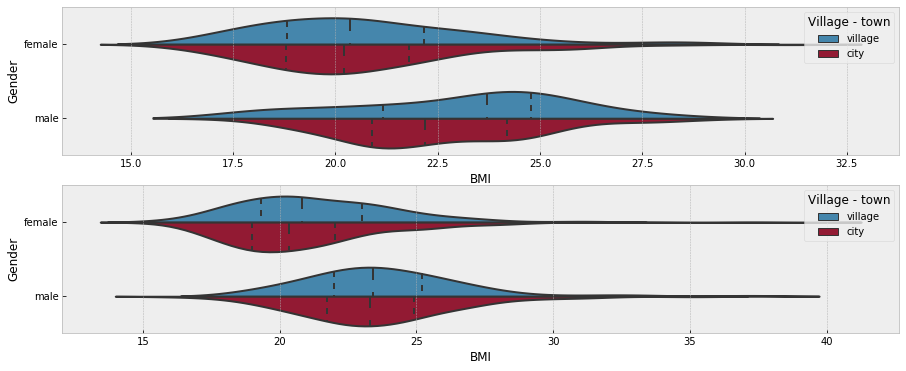

In [68]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
data_under = data[data['Age']<20]
data_above = data[data['Age']>=20]
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_under, split=True, 
                   inner = 'quartile', ax=ax[0], hue_order=['village', 'city']);
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_above, split=True, 
                   inner = 'quartile', ax=ax[1], hue_order=['village', 'city']);

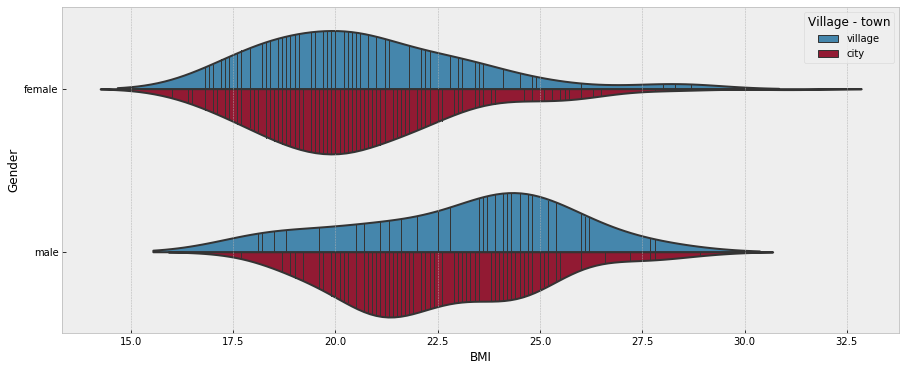

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_under, 
               split=True, inner='stick', ax=ax, hue_order=['village', 'city']);

In [70]:
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y, ax=ax)
    ax.set_ylabel("Correlation coefficients")


def correlation_plot(var_of_interest, df_main, mapping, figsize=(10, 30)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0, 1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs

    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace=True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)

    #correlating non-categorical varibales
    cols_floats = [col for col in df.columns if df[col].dtype != 'object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)

    #correlating categorical variables
    cols_cats = [col for col in df.columns if df[col].dtype == 'object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5, 10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]

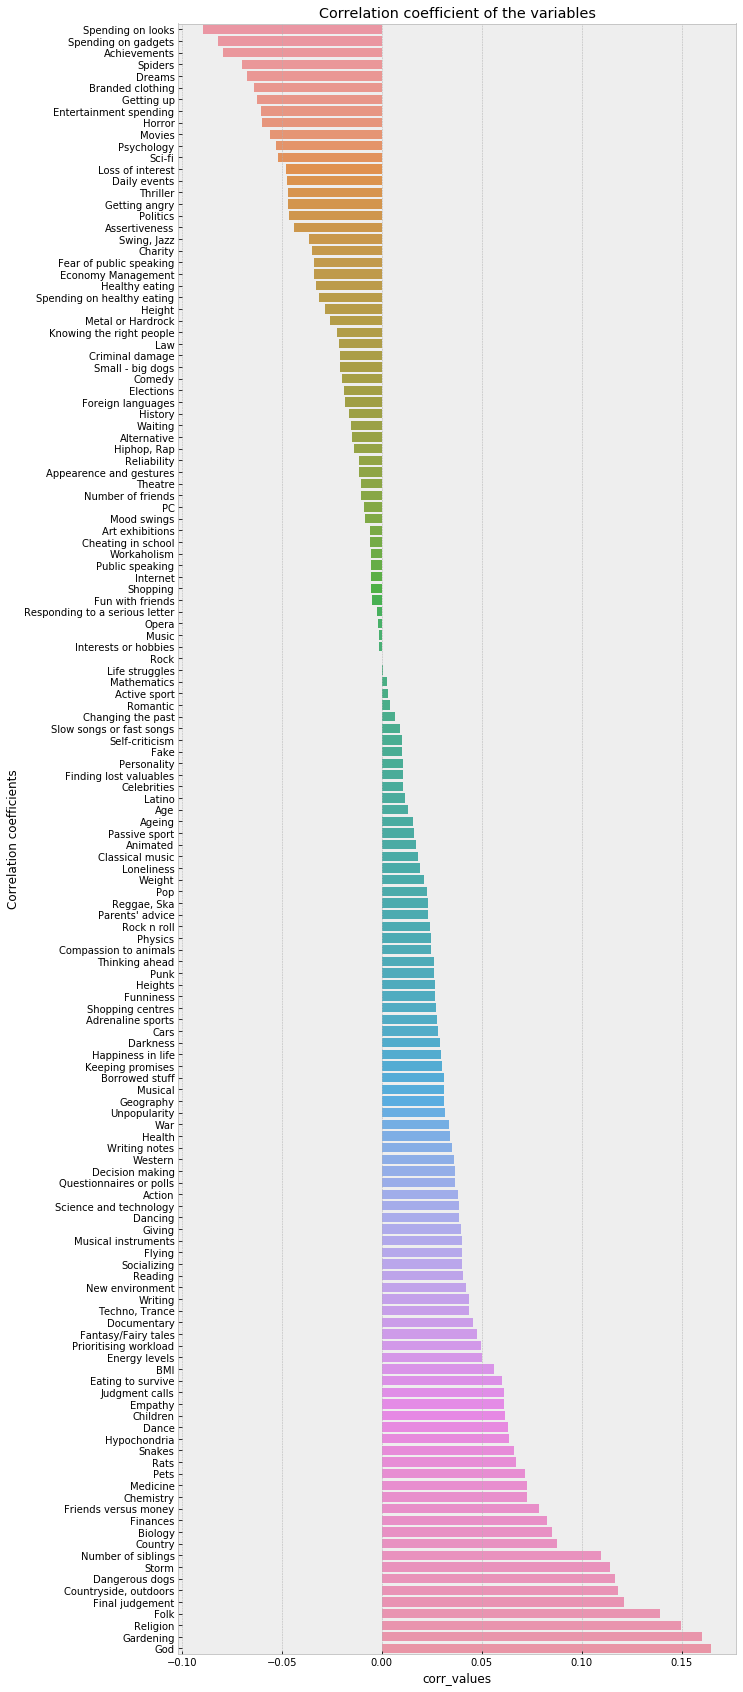

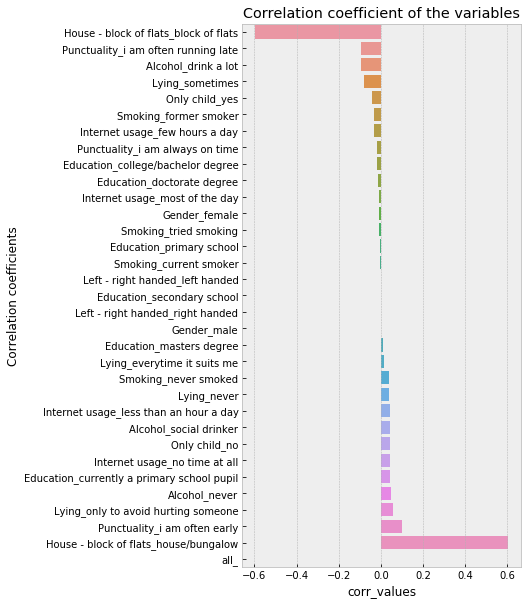

In [71]:
corrs_area = correlation_plot(var_of_interest, young, mapping)

In [72]:
#The strongest correlations that we have are  
corr_num = corrs_area[0]
corr_cats = corrs_area[1]
display(corr_num[corr_num.corr_values == max(corr_num.corr_values)])
display(corr_num[corr_num.corr_values == min(corr_num.corr_values)])
display(corr_cats[corr_cats.corr_values == max(corr_cats.corr_values)])
display(corr_cats[corr_cats.corr_values == min(corr_cats.corr_values)])

,features,corr_values
101,God,0.164462


,features,corr_values
132,Spending on looks,-0.089162


,features,corr_values
31,House - block of flats_house/bungalow,0.604884


,features,corr_values
30,House - block of flats_block of flats,-0.598687


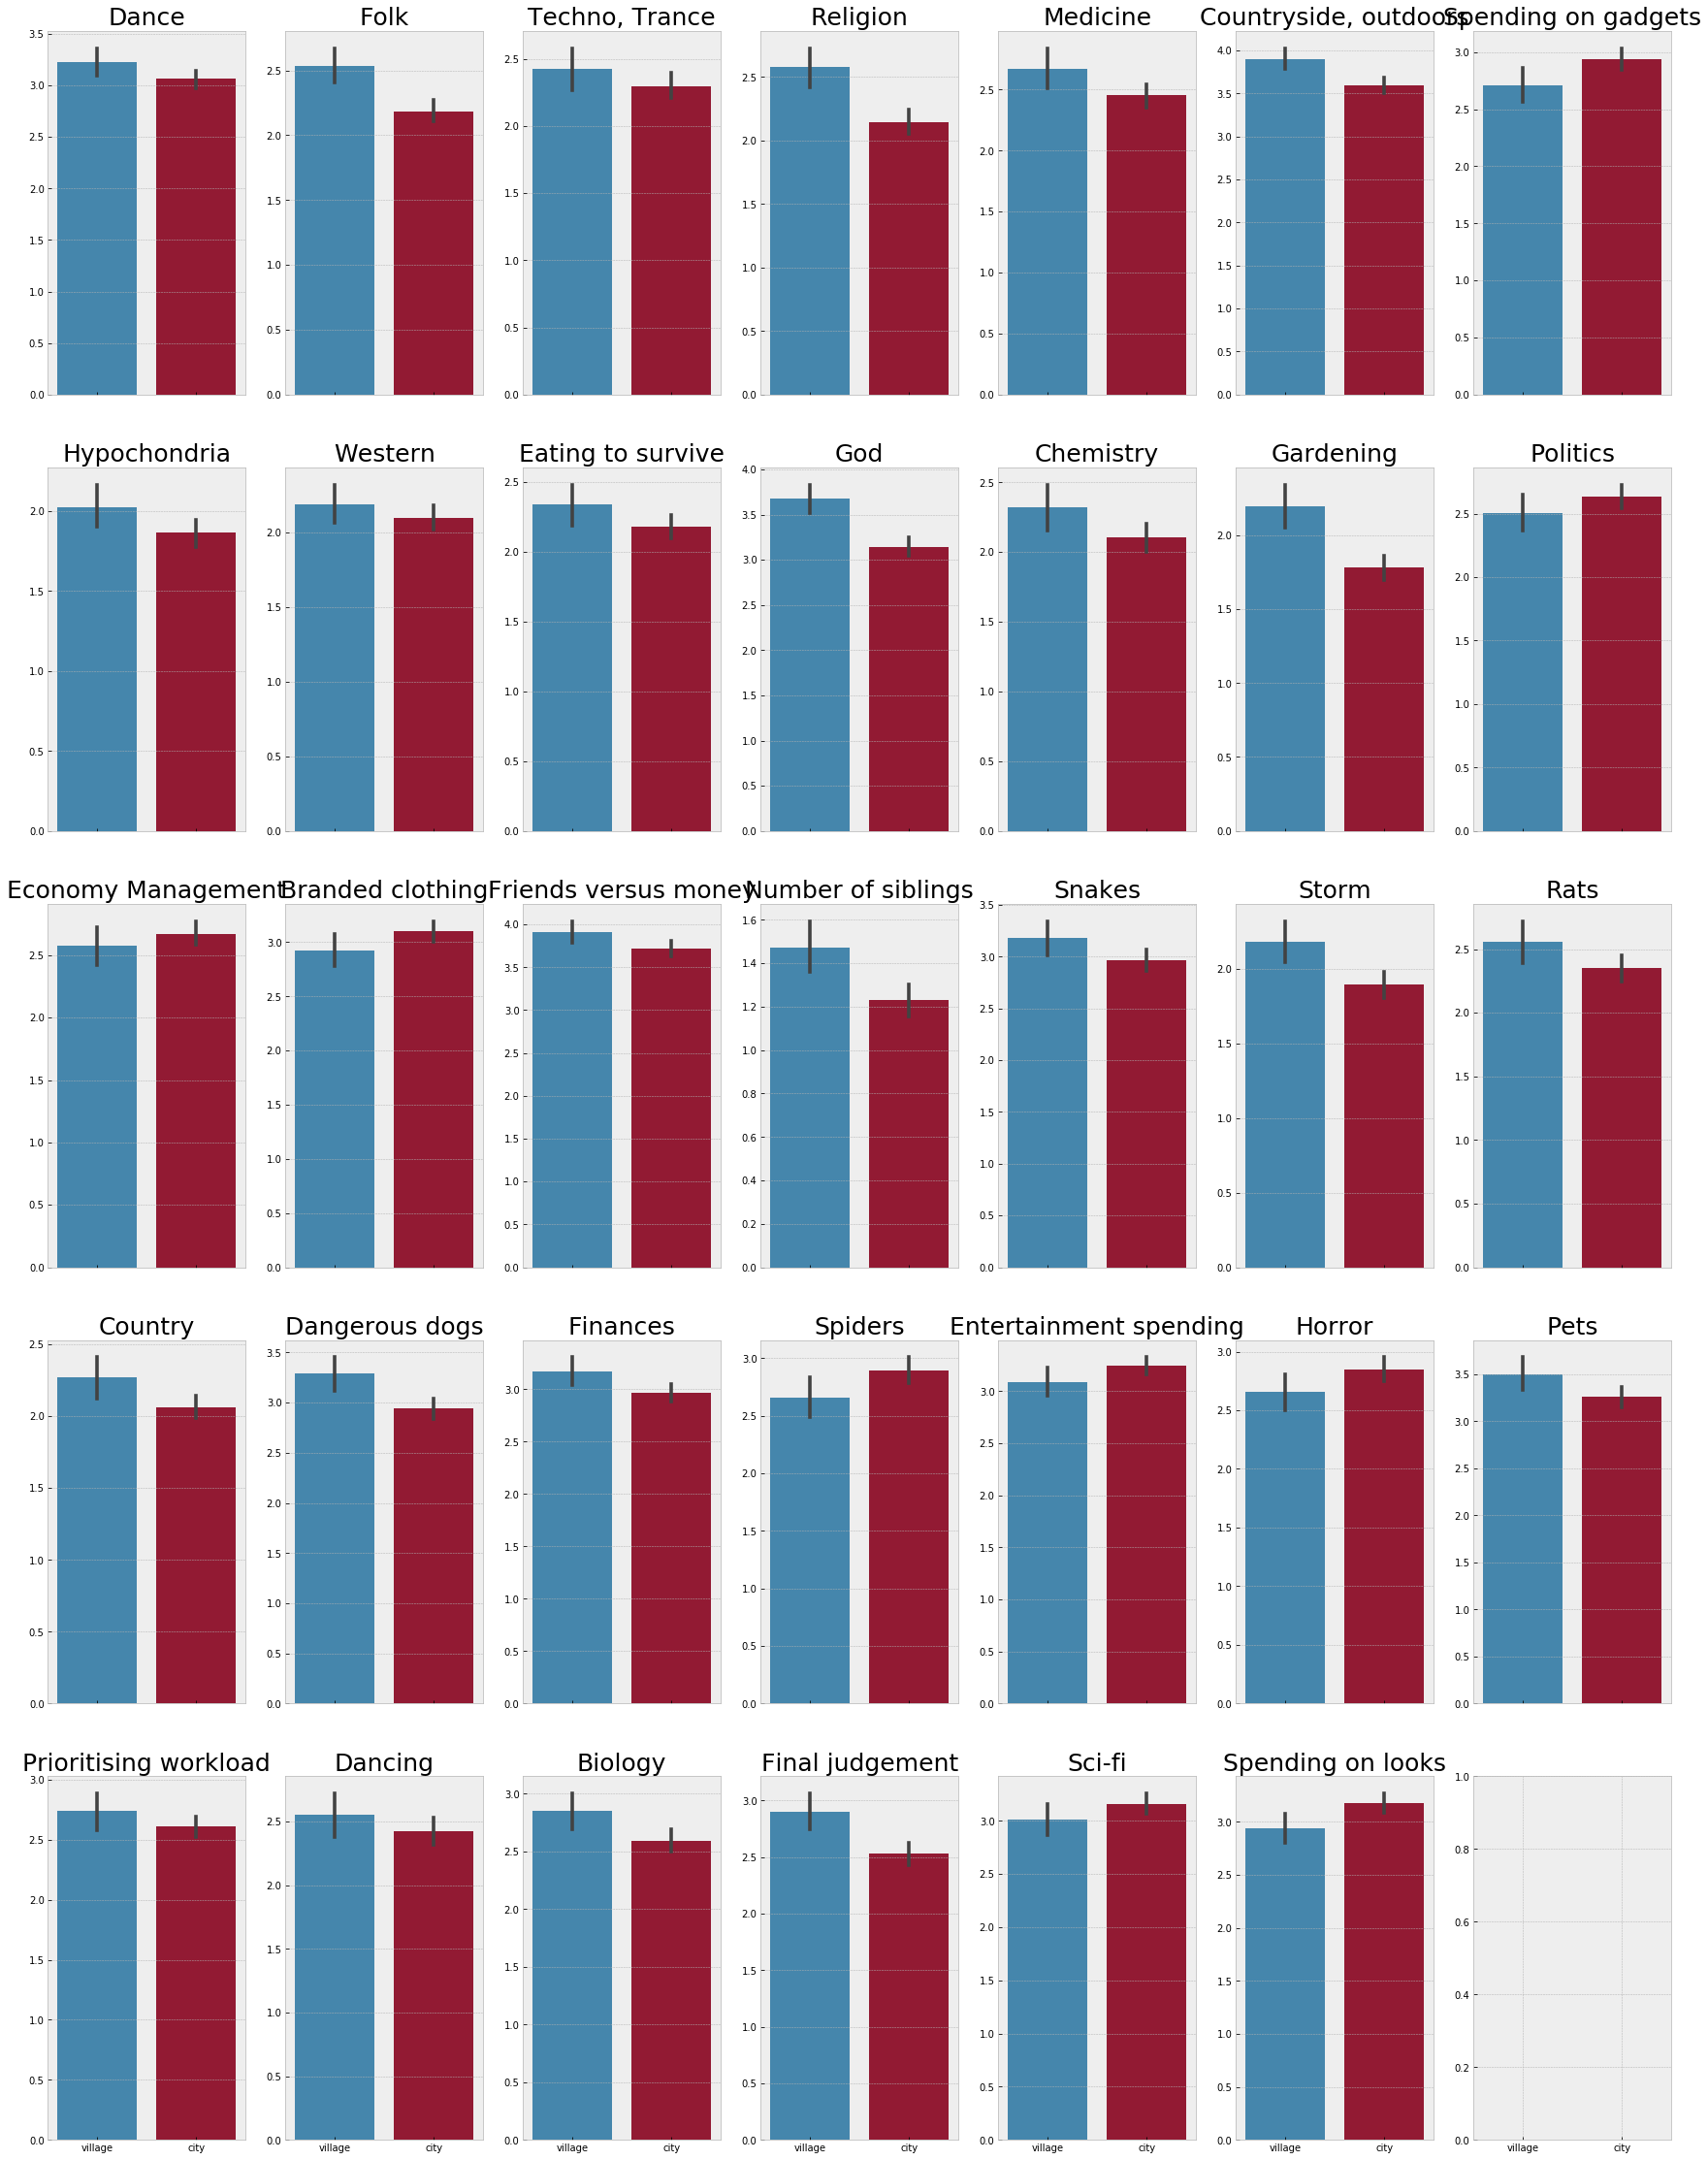

In [73]:
good_columns = ['Dance', 'Folk', 'Techno, Trance','Religion', 'Medicine', 'Countryside, outdoors',
                'Spending on gadgets','Hypochondria','Western', 'Eating to survive', 
                'God', 'Chemistry', 'Gardening', 'Politics','Economy Management',
                'Branded clothing', 'Friends versus money','Number of siblings', 'Snakes',
                'Storm', 'Rats', 'Country', 'Dangerous dogs', 'Finances', 'Spiders', 
                'Entertainment spending', 'Horror', 'Pets', 'Prioritising workload', 'Dancing',
                'Biology', 'Final judgement', 'Sci-fi', 'Spending on looks']
fig, ax = plt.subplots(nrows=5, ncols=7 ,figsize=(30,40), sharex=True)
start = 0
for j in range(5):
    for i in range(7):
        if start == len(good_columns):
            break
        sns.barplot(y=good_columns[start], x=var_of_interest, data=young, ax=ax[j,i])
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlabel('')
        ax[j,i].set_title(good_columns[start], fontsize=25)
        start += 1

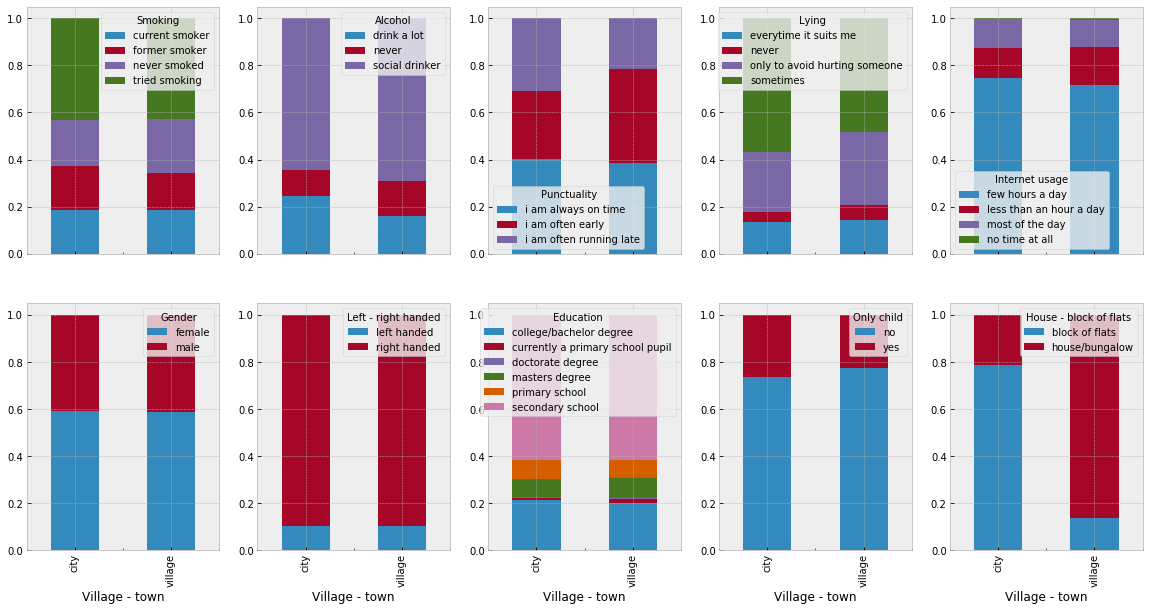

In [74]:
features_cats = [col for col in young.columns if young[col].dtype=='object']
features_cats.remove(var_of_interest)
fig, ax = plt.subplots(nrows=2, ncols=5,figsize=(20,10), sharex=True)
start = 0
for j in range(2):
    for i in range(5):
        tab = pd.crosstab(young[var_of_interest], young[features_cats[start]])
        tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
        tab_prop.plot(kind="bar", stacked=True, ax=ax[j,i])
        start += 1

In [75]:
corr = young.corr()
# code: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

os = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
display(os.head(10))
display(os.tail(10))

Weight               BMI                 0.845273
Height               Weight              0.737569
Biology              Medicine            0.717139
                     Chemistry           0.688564
Fantasy/Fairy tales  Animated            0.676276
Shopping             Shopping centres    0.650689
Chemistry            Medicine            0.629480
Classical music      Opera               0.595599
Mathematics          Physics             0.591291
Snakes               Rats                0.570754
dtype: float64

Reading            Cars                -0.309490
Cars               Life struggles      -0.313389
Loneliness         Number of friends   -0.315768
Romantic           Height              -0.320189
Loneliness         Energy levels       -0.347802
Changing the past  Happiness in life   -0.354172
Dangerous dogs     Small - big dogs    -0.372104
Life struggles     Weight              -0.382689
                   Height              -0.398125
Loneliness         Happiness in life   -0.440208
dtype: float64

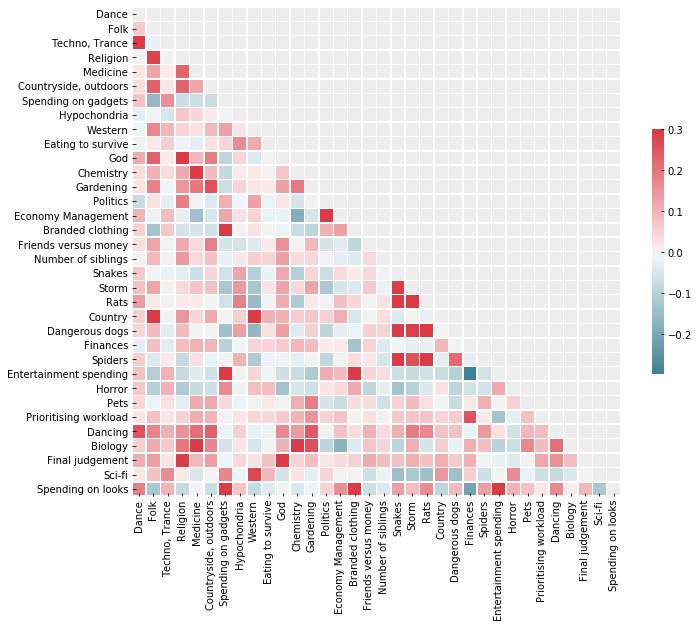

In [95]:
corr = young[good_columns].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5})

In [96]:
print (os['Final judgement'][0:2])


God        0.492422
Charity    0.168018
dtype: float64


In [97]:
print (os['Religion'][0:2])

God                0.509766
Final judgement    0.293639
dtype: float64


In [98]:
print (os['Entertainment spending'])

Spending on looks             0.408424
Spending on gadgets           0.339329
Height                        0.163149
Spending on healthy eating    0.145695
Weight                        0.129842
BMI                           0.064862
Number of siblings            0.033904
Age                          -0.038119
dtype: float64


In [99]:
corr = young.corr()
os = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
display(os[abs(os)>0.5])
drop_colinera_cols = os[abs(os)>0.5].reset_index()['level_1']

Weight                   BMI                  0.845273
Height                   Weight               0.737569
Biology                  Medicine             0.717139
                         Chemistry            0.688564
Fantasy/Fairy tales      Animated             0.676276
Shopping                 Shopping centres     0.650689
Chemistry                Medicine             0.629480
Classical music          Opera                0.595599
Mathematics              Physics              0.591291
Snakes                   Rats                 0.570754
Metal or Hardrock        Punk                 0.547129
Art exhibitions          Theatre              0.540432
Rock                     Metal or Hardrock    0.527834
Shopping                 Spending on looks    0.512193
Religion                 God                  0.509766
Rock                     Punk                 0.508960
Fear of public speaking  Public speaking      0.507708
Horror                   Thriller             0.505720
Storm     

In [101]:
clean_data = young.dropna(subset=[var_of_interest])
features_int = [col for col in clean_data.columns if clean_data[col].dtype!='object']
features_cats = [col for col in clean_data.columns if clean_data[col].dtype=='object']

features_int = list(set(features_int) - set(drop_colinera_cols))
print ('Number of features {:.0f}'.format(len(features_int)))

Number of features 123


In [102]:
X = clean_data[features_int]
mean_values = X.mean(axis=0)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)
#X_cats = clean_data[features_cats].drop(var_of_interest, 1)
#X_cats = X_cats.drop('House - block of flats', 1)
#X_cats = pd.get_dummies(X_cats)
#print(X.shape)
#print(X_cats.shape)

In [105]:
Y = clean_data[var_of_interest]
for key, val in mapping[var_of_interest].items():
    Y.replace(key,val, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=100)

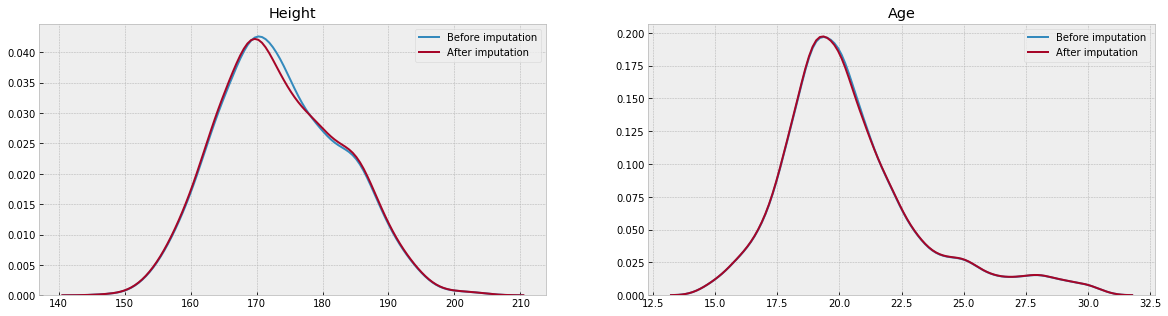

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.kdeplot(X.Height,label = 'Before imputation', ax = ax[0]);
sns.kdeplot(clean_data.Height, label = 'After imputation', ax = ax[0]);
ax[0].set_title('Height');

sns.kdeplot(X.Age,label = 'Before imputation', ax = ax[1]);
sns.kdeplot(clean_data.Age, label = 'After imputation', ax = ax[1]);
ax[1].set_title('Age');

#sns.kdeplot(X.Weight,label = 'Before imputation', ax = ax[2])
#sns.kdeplot(clean_data.Weight, label = 'After imputation' , ax = ax[2])
#ax[2].set_title('Weight')

In [109]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [118]:
# gridsearch for parameter tuning
from sklearn.linear_model import LogisticRegression

clr = LogisticRegression()
KF = KFold(len(x_train))
param_grid = {'C':[.001,.01,.03,.1,.3,1,3,10]}
grsearch = GridSearchCV(clr, param_grid=param_grid, cv=KF, scoring = 'f1')
grsearch.fit(x_train, y_train)
print(grsearch.best_params_)

# fitting logistic regression and evaluating
clr = LogisticRegression(C=grsearch.best_params_['C'])
clr.fit(x_train, y_train)

mean_accuracy = np.mean(cross_val_score(clr, x_train, y_train, cv=KF))
print('Average accuracy score on CV set: {:.2f}'.format(mean_accuracy))

mean_f1 = np.mean(cross_val_score(clr, x_train, y_train, cv=KF, scoring = 'f1'))
print('Average f1 on CV set: {:.2f}'.format(mean_f1))
print('')
print('Accuracy score on test set is: {:.2f}'.format(clr.score(x_test, y_test)))
recall = recall_score(y_test, clr.predict(x_test))
print ('Recall on test: {:.2f}'.format(recall))
precision = precision_score(y_test, clr.predict(x_test))
print ('Presicion on test: {:.2f}'.format(precision))
print ('F1 score on test: {:.2f}'.format((2*recall*precision /(recall + precision))))

{'C': 0.001}
Average accuracy score on CV set: 0.66
Average f1 on CV set: 0.09

Accuracy score on test set is: 0.66
Recall on test: 0.28
Presicion on test: 0.53
F1 score on test: 0.36


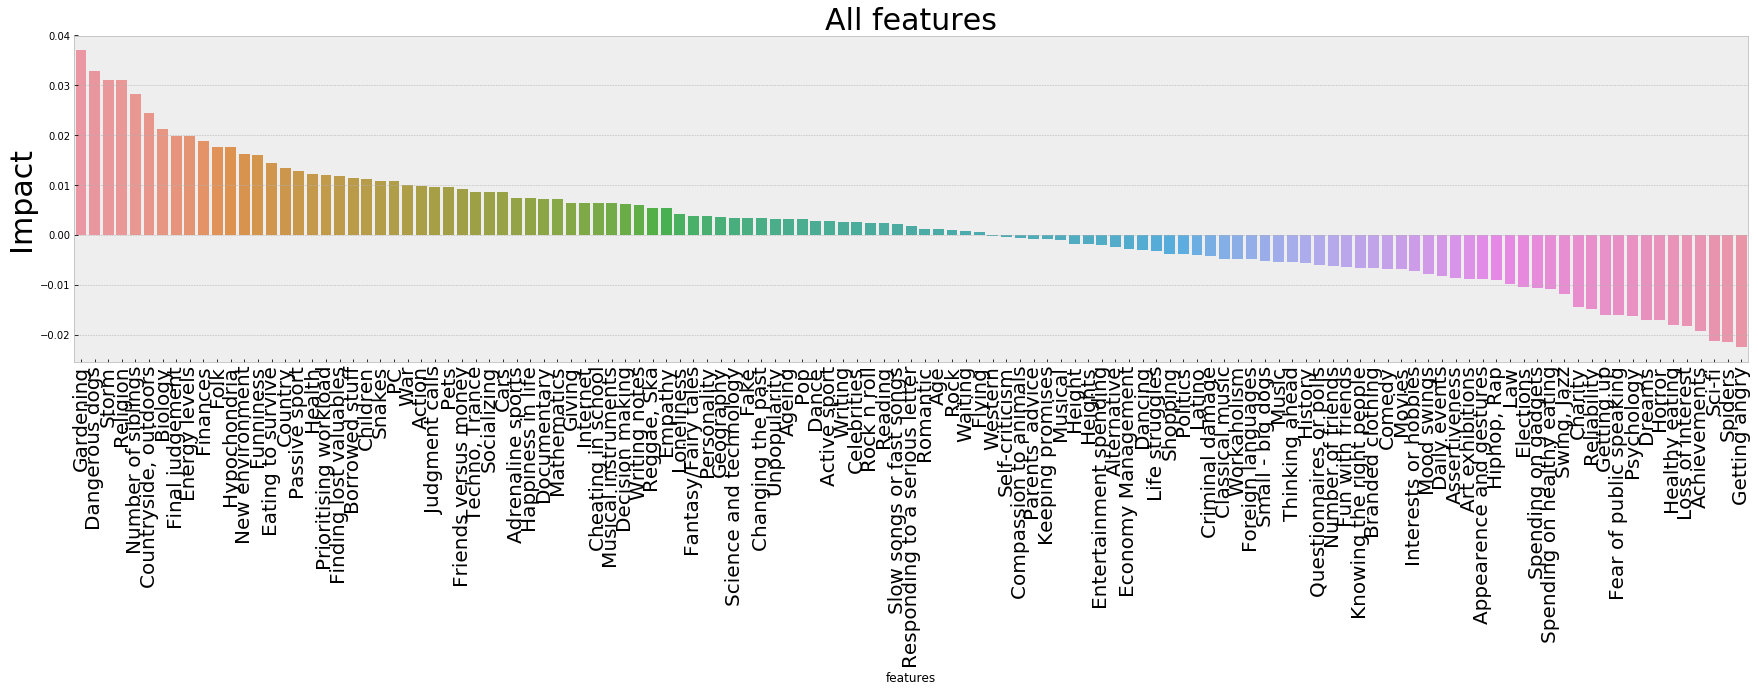

In [119]:
feat_coeff = pd.DataFrame({'features': X.columns,'impacts': clr.coef_[0]})
feat_coeff = feat_coeff.sort_values('impacts', ascending=False)

fig, ax1 = plt.subplots(1,1, figsize=(30,6));
sns.barplot(x=feat_coeff.features, y=feat_coeff.impacts, ax=ax1);
ax1.set_title('All features', size=30);
ax1.set_xticklabels(labels=feat_coeff.features, size=20, rotation=90);
ax1.set_ylabel('Impact', size=30);

In [120]:
print(grsearch)

GridSearchCV(cv=KFold(n_splits=701, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
